In [1]:
import numpy as np
import matplotlib.pyplot as plt



<img src="Figs/fga.png" alt="isolated"/>



<h1 style="text-align: center;">Representação em Banda Básica e Banda Passante</h1>

<h3 style="text-align: center;">Disciplina: Princípios de Comunicação</h3>


<p style="text-align: center;">Prof. Daniel C. Araújo</p>


# Conteúdo
1. Fundamentos
2. Conversão Banda-passante Banda-básica

<h1 style="text-align: center;">Fundamentos</h1>

## Representação de banda-básica ( passa-baixa) 

**Definição**:  Conceito: São sinais cujo espectro estão centrados na frequência 0.

Exemplos : 
  - Música 
  - Voz
  - Vídeo

<img src="Figs/Sinais/speech.png" alt="isolated"/>  

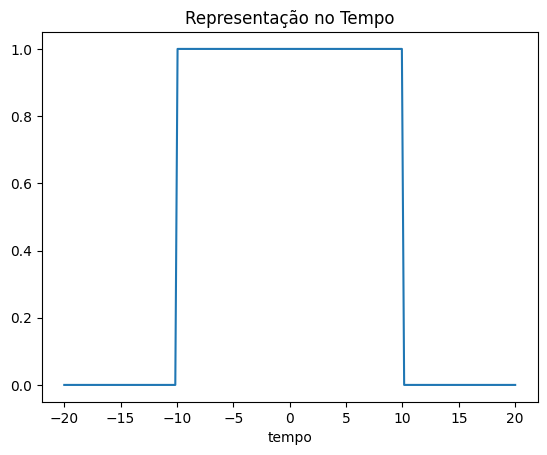

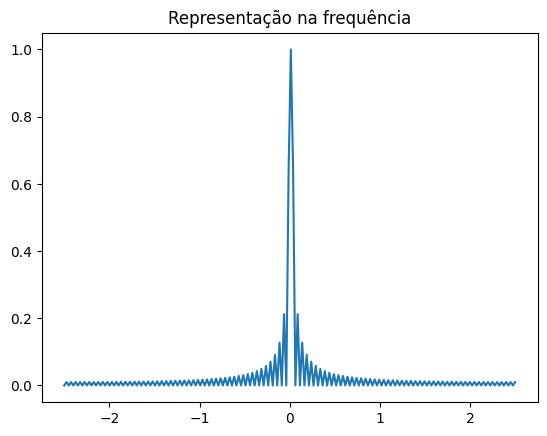

In [2]:
def rect_pulse(T,fs,Ts):

    nSamples = int(Ts*fs)
    t = np.linspace(-Ts/2,Ts/2,nSamples)

    A = [1 if abs(t[ii])<=T else 0 for ii in range(len(t))]

    return t, A

def time_plot(T,fs,Ts):

    res = rect_pulse(T,fs,Ts)
    plt.plot(*res)
    plt.xlabel("tempo") 
    plt.title("Representação no Tempo")
    plt.show()

def freq_plot(T,fs,Ts):
    res = rect_pulse(T,fs,Ts)
    Mf = np.fft.fftshift(np.fft.fft(res[1],norm="ortho"))
    nSamples = len(res[1])

    freq  = np.linspace(-fs/2,fs/2,nSamples)

    plt.plot(freq,abs(Mf)/np.max(abs(Mf)))
    plt.title("Representação na frequência")
    plt.show()

T =10
fs = 5
Ts =40


time_plot(T,fs,Ts)
freq_plot(T,fs,Ts)



## Sinais de banda passante

**Definição:** São sinais cuja a frequência central estão centradas em uma frequência central 

<img src="Figs/Sinais/passband.png" alt="isolated"/>  


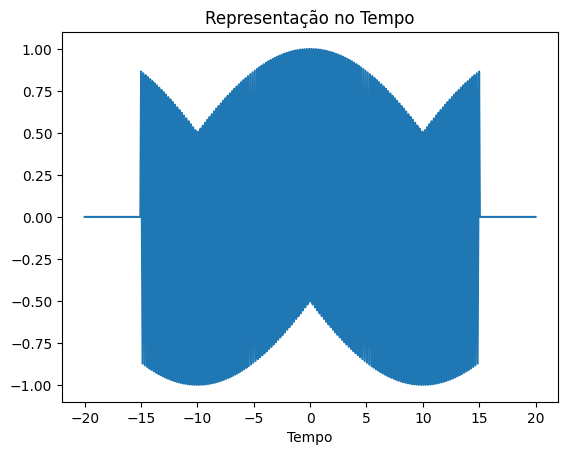

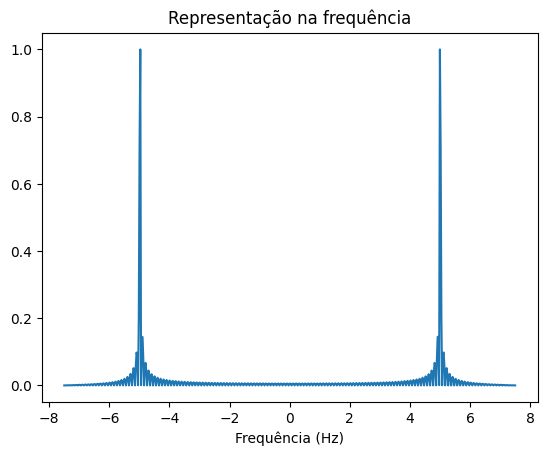

In [4]:
def rect_pulse(T,fs,Ts):

    nSamples = int(Ts*fs)
    t = np.linspace(-Ts/2,Ts/2,nSamples)

    A = [1 if abs(t[ii])<=T else 0 for ii in range(len(t))]
    fc = 10
    A = A*np.cos(2*np.pi*fc*t)
    return t, A

def time_plot(T,fs,Ts):

    res = rect_pulse(T,fs,Ts)
    plt.plot(*res)
    plt.xlabel("tempo") 
    plt.title("Representação no Tempo")
    plt.xlabel("Tempo")
    plt.show()

def freq_plot(T,fs,Ts):
    res = rect_pulse(T,fs,Ts)
    Mf = np.fft.fftshift(np.fft.fft(res[1],norm="ortho"))
    nSamples = len(res[1])

    freq  = np.linspace(-fs/2,fs/2,nSamples)

    plt.plot(freq,abs(Mf)/np.max(abs(Mf)))
    plt.title("Representação na frequência")
    plt.xlabel("Frequência (Hz)")
    plt.show()

T =15
fs = 15
Ts =40


time_plot(T,fs,Ts)
freq_plot(T,fs,Ts)


<h1 style="text-align: center;"> Conversão de Banda-básica para Banda-passante</h1>

## Equivalente de banda-básica

$$
x_+(t) = \mathcal{F}^{-1}[X_+(f)] \newline
      = \mathcal{F}^{-1}[X(f)u(f)] \newline 
      = x(t) \circ (\frac{1}{2} \delta (t) + \jmath \frac{1}{2\pi t}) \newline
      = \frac{1}{2}x(t) + \jmath \frac{1}{2}\hat{x}(t)

$$
em que 
$$ 
 \mathcal{F}^{-1}[\hat{x}(t)] = -\jmath \textrm{sgn}(f)X(f)
$$
<img src="Figs/Sinais/passband.png" alt="isolated"/>  

## Equivalente passa-baixa

**Definição**: O equivalente passa-baixa de um sinal $x(t)$ é dado por

$$
 X_l(f) = 2X_+(f+f_o) \newline
        = 2X(f+f_o) U(f + f_o)
$$

Convertendo para o tempo:

$$
  x_l(t) =\mathcal{F}^{-1}[X_l(f)] \newline
         = 2x_+(t)e^{-\jmath 2 \pi f_o t} \newline
         = (x(t) + \jmath \hat {x}(t))e^{-\jmath 2 \pi f_o t}.
$$
Portanto:

$$
  x(t) = Re\{ x_l(t)e^{\jmath 2 \pi f_o t}\}
$$


<img src="Figs/Sinais/equivalente_passa_baixa.png" alt="isolated"/>  

## Componentes em fase e quadratura

$$
\begin{align*}
   x_l(t) &= (x(t) + \jmath \hat {x}(t))e^{-\jmath 2 \pi f_o t} \newline
          &= (x(t)\cos(2\pi f_o t) + \hat {x}(t)\sin(2 \pi f_o t) ) + \jmath (\hat {x}(t)\cos(2\pi f_o t) + x(t)\sin(2 \pi f_o t) )
\end{align*}
$$
A componente real é chamada de fase:
$$
   x_i(t) = x(t)\cos(2\pi f_o t) + \hat {x}(t)\sin(2 \pi f_o t)
$$

A componente imaginária é chamada de quadratura:
$$
  x_q(t) = \hat {x}(t)\cos(2\pi f_o t) - x(t)\sin(2 \pi f_o t)
$$

Das duas expressões é possível escrevê-las de forma matricial :
$$
\begin{bmatrix} x_i(t)  \\ x_q(t) \end{bmatrix} = \begin{bmatrix} \cos(2\pi f_o t) & \sin(2 \pi f_o t)  \\ -\sin(2 \pi f_o t)  & \cos(2\pi f_o t)\end{bmatrix} \begin{bmatrix} x(t)  \\ \hat {x}(t) \end{bmatrix}
$$

 > A expressão define a operação de recepção. Indica a converssão do sinal de banda-passante para o seu equivalente passa-baixa

A expreesão inversa pode ser obtida através da inversão matricial. 

$$
\begin{bmatrix} x(t)  \\ \hat {x}(t) \end{bmatrix} = \begin{bmatrix} \cos(2\pi f_o t) & -\sin(2 \pi f_o t)  \\ \sin(2 \pi f_o t)  & \cos(2\pi f_o t)\end{bmatrix} \begin{bmatrix}  x_i(t)  \\ x_q(t) \end{bmatrix}
$$

 > A expressão define a operação de transmissão. Indica a conversão do sinal de banda-básica para a banda passante

## Representação Cartesiana x Polar

 - Representação cartesiana

 $$
  x_l(t) = x_i(t) + \jmath x_q(t)
 $$

 - Representação polar

 $$
 x_l(t) = r(t) e^{\jmath \theta}
 $$
 em que 
 $$
 r(t) = \sqrt{x^2_i(t) + x^2_q(t)}
 $$
 e
 $$
 \theta (t) = \textrm{arctan}{\left( \frac{x_q(t)}{x_i(t)} \right)}
 $$

 - O sinal de banda-passante pode ser definido como 

$$
x(t) = Re\{r(t)e^{\jmath 2\pi f_o t + \theta}\}
$$
ou
$$
x(t)  =  r(t)\cos(2\pi f_o t + \theta)
$$

## Considerações sobre energia

 - Pelo teorema de Parseval 

 $$
 E_x = \int _{-\infty}^{\infty} |x(t)|^2 dt  =  \int _{-\infty}^{\infty} |X(f)|^2 df  
 $$

 - A energia de banda-básica e banda-passante é dado por:

 $$
 \begin{align*}
 E_x &=& \int _{-\infty}^{\infty}  | X_+(f) + X_-(f)|^2 df \newline 
     &=&  \int _{-\infty}^{\infty}  | X_+(f)|^2 df + \int _{-\infty}^{\infty}  | X_-(f)|^2 df \newline
     &=& 2\int _{-\infty}^{\infty}  | X_+(f)|^2 df \\
     &=& 2 E_{x_+}
 \end{align*}
 $$

 - Utilizando a representação de banda-básica tem-se que :

 $$
  \begin{align*}
  E_x &= 2 E_{x_+}  \\
     &= \int _{-\infty}^{\infty}  | X_+(f)|^2 df \\
     &= 2 \int _{-\infty}^{\infty}  | \frac{X_l(f)}{2}|^2 df \\
     &= \frac{2}{4} \int _{-\infty}^{\infty}  | X_l(f)|^2 df \\
     &= \frac{1}{2}\int _{-\infty}^{\infty}  | X_l(f)|^2 df  \\
     &= \frac{1}{2} E_{x_l}
  \end{align*}
 $$

 > **IMPORTANTE**: Energia da banda passante é metade da energia de banda-básica.